# Performing Regression Analysis in Python to predict the bottom hole circulating temperature in a High Pressure / High Temperature Haynesville Shale Horizontal well

### This model was developed for predicting temperature in future wells drilled with a 7-7/8" production hole instead of a 6-3/4" production hole.  The project is organized as follows: (a) data processing and variable selection;  (b) regression analysis (c) predictive results.

### Author: Isaac Shareef  
#### Date: 27 April, 2020

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yellowbrick

In [97]:
data = pd.read_csv('/Users/isaacshareef/Desktop/Python_Code/Jupyter_Notebook/Data/test.csv')
data.shape
print(data)

                                Name    Depth  Temperature     ROP
0       HA RA SU60 JONES 2-35HC 1ALT  10085.0      -999.25 -999.25
1       HA RA SU60 JONES 2-35HC 1ALT  10086.0      -999.25 -999.25
2       HA RA SU60 JONES 2-35HC 1ALT  10087.0       229.65 -999.25
3       HA RA SU60 JONES 2-35HC 1ALT  10088.0       227.31 -999.25
4       HA RA SU60 JONES 2-35HC 1ALT  10089.0       224.11 -999.25
...                              ...      ...          ...     ...
111820                           NaN      NaN          NaN     NaN
111821                           NaN      NaN          NaN     NaN
111822                           NaN      NaN          NaN     NaN
111823                           NaN      NaN          NaN     NaN
111824                           NaN      NaN          NaN     NaN

[111825 rows x 4 columns]


In [137]:
data = data[(
    data.Temperature > 1)
    & (data.Temperature <500)
    & (data.ROP < 300)
    & (data.ROP >0)
    & (data.Depth > 10000)
]

#movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75773 entries, 57 to 96780
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         75773 non-null  object 
 1   Depth        75773 non-null  float64
 2   Temperature  75773 non-null  float64
 3   ROP          75773 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.9+ MB


In [138]:
X1 = data[['Depth', 'ROP']].reset_index(drop = True)
X2 = data[['Depth', 'ROP']].reset_index(drop = True)
X3 = data[['Depth', 'ROP']].reset_index(drop = True)
y = data['Temperature'].reset_index(drop = True)


In [139]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import RobustScaler as RS
from sklearn.preprocessing import Normalizer as N

stand_scaler = SS()
robust_scaler = RS()
normz_scaler = N()

X_sscale = stand_scaler.fit_transform(X1,y)
X_rscale = robust_scaler.fit_transform(X2,y)
X_nscaler = normz_scaler.fit_transform(X3,y)

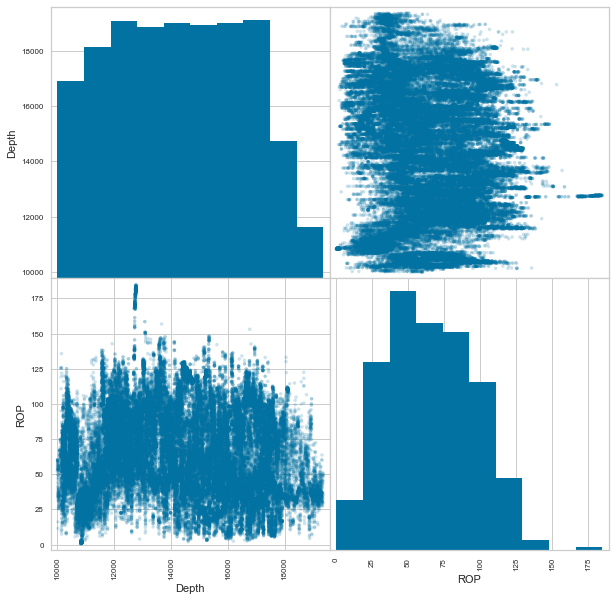

In [140]:
from pandas.plotting import scatter_matrix

attributes = list(X1.columns)
scatter_matrix(X[attributes], figsize = (10,10), alpha = 0.2)
plt.show()

In [169]:
from sklearn.model_selection import train_test_split

#This is the train, test, split for the scander scaler(ss) transformed data
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(
    X_sscale, y, test_size = .3, random_state = 42)

In [173]:
from sklearn.linear_model import Ridge

modelss = Ridge().fit(X_ss_train, y_ss_train)
ss_scores = modelss.score(X_ss_train, y_ss_train)
ss_scores

0.869280648570796

In [143]:
#This is the train, test, split for the robust scaler (rs) transformed data
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(
    X_rscale, y, test_size = .2, random_state = 42)

In [144]:
modelrs = LinearRegression().fit(X_rs_train, y_rs_train)
rs_scores = modelrs.score(X_rs_train, y_rs_train)
rs_scores

0.8695946271571083

In [145]:
#This is the train, test, split for the robust scaler (n) transformed data
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(
    X_nscaler, y, test_size = .2, random_state = 42)

In [146]:
modeln = LinearRegression().fit(X_n_train, y_n_train)
rn_scores = modeln.score(X_n_train, y_n_train)
rn_scores

0.06281456476997926

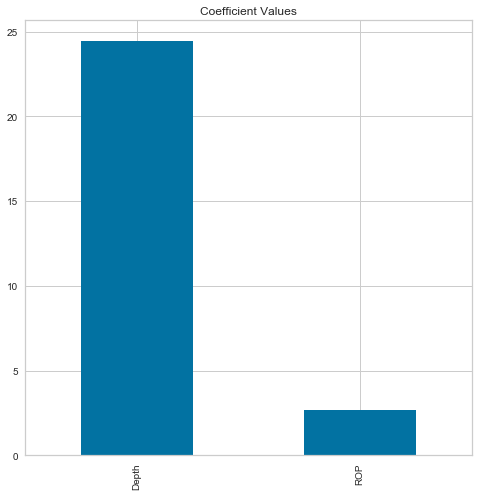

In [147]:
from pandas import Series

ss_coef = modelss.coef_
ss_vars = X.columns

co_var = Series(ss_coef, ss_vars)
co_var.plot(kind = 'bar', figsize = (8,8), title = 'Coefficient Values')
plt.show()

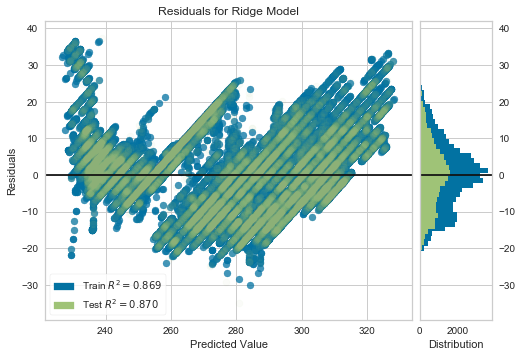

In [158]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

LR = Ridge()
visualizer = ResidualsPlot(LR, test_alpha = 0.05 )
visualizer.fit(X_ss_train, y_ss_train)
visualizer.score(X_ss_test, y_ss_test)
visualizer.show()

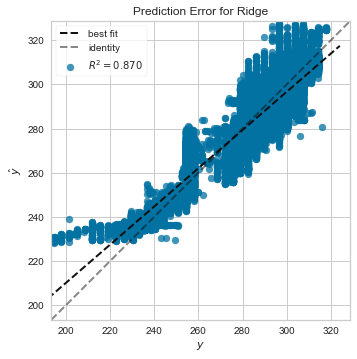

In [162]:
from yellowbrick.regressor import PredictionError

pe_viz = PredictionError(LR)
pe_viz.fit(X_ss_train, y_ss_train)
pe_viz.score(X_ss_test, y_ss_test)
pe_viz.show()